In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score
from tensorflow.keras import layers, models
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import roc_auc_score, roc_curve



In [2]:
#Step 1: Load the dataset
df = pd.read_csv('Home_loan_data.csv')

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(307511, 122)

In [5]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
#Step 2: Check for missing vales

df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [9]:
#Display missing values sorted (highest first)

df.isnull().sum().sort_values(ascending = False)

COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
COMMONAREA_MEDI             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
                             ...  
FLAG_DOCUMENT_16                 0
FLAG_DOCUMENT_15                 0
FLAG_DOCUMENT_14                 0
FLAG_DOCUMENT_20                 0
FLAG_DOCUMENT_21                 0
Length: 122, dtype: int64

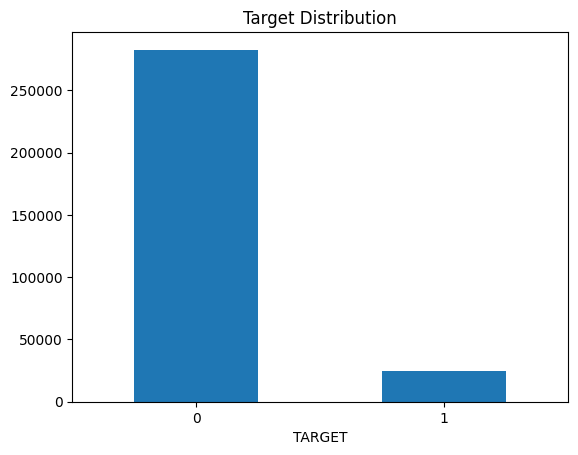

In [10]:
df['TARGET'].value_counts().plot(kind = 'bar', title = 'Target Distribution', rot=0)
plt.show()

In [11]:
#step 3: Print the percentage of defualt (TARGET = 1) in the dataset
default_percent = (df['TARGET'].sum() / len(df)) * 100
print(f"Percentage of defualt (TARGET = 1): {default_percent:.2f}%")

Percentage of defualt (TARGET = 1): 8.07%


In [12]:
#Step 4: Handle imbalance in the dataset using SMOTE

#Seperate features (X) and target (y) before encoding
X = df.drop('TARGET', axis = 1)
y = df['TARGET']


#Convert categorical columns to numeric
X = pd.get_dummies(X, drop_first = True)

#Fix Nan Values
X = X.fillna(X.median())

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

#Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Check new class distribution
print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_resampled.value_counts())

Before SMOTE:
 TARGET
0    226148
1     19860
Name: count, dtype: int64

After SMOTE:
 TARGET
0    226148
1    226148
Name: count, dtype: int64


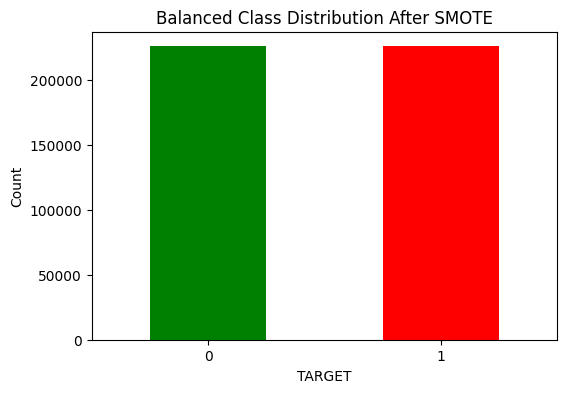

In [13]:
#Step 5: Plot the balanced data after SMOTE
plt.figure(figsize=(6,4))
y_train_resampled.value_counts().plot(
    kind='bar',
    color=['green','red'],
    title='Balanced Class Distribution After SMOTE',
    rot=0
)
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.show()

In [14]:
#Step 6: Encode the categorical columns

encoded_df = df.copy()

#select categorical columns
categorical_cols = encoded_df.select_dtypes(include=['object', 'category']).columns

#Apply LabelEncoder to all categorical columns at once using DataFrame.apply
le=LabelEncoder()
encoded_df[categorical_cols] = encoded_df[categorical_cols].apply(le.fit_transform)

#verify encoding
print("Encoded categorical columns:\n", categorical_cols.tolist())
encoded_df.head()


Encoded categorical columns:
 ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#Step 7: Calculate sensitivity (recall)
model = LogisticRegression(max_iter = 1000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

#predict on test set
y_pred = model.predict(X_test)

#print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion_matrix:\n", cm)

#Calculate sensitivity (recall)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity:.2f}")

#Accuracy 
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")


C:\Users\Test\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion_matrix:
 [[36478 20060]
 [ 2307  2658]]
Sensitivity (Recall): 0.54
Accuracy: 0.64


Epoch 1/10
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - auc: 0.5132 - loss: 548.5586 - val_auc: 0.5442 - val_loss: 1.2818
Epoch 2/10
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - auc: 0.5130 - loss: 10.7933 - val_auc: 0.5270 - val_loss: 5.1508
Epoch 3/10
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - auc: 0.5054 - loss: 1.1844 - val_auc: 0.5129 - val_loss: 1.6036
Epoch 4/10
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - auc: 0.5031 - loss: 3.9221 - val_auc: 0.4999 - val_loss: 0.8196
Epoch 5/10
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - auc: 0.5007 - loss: 1.7765 - val_auc: 0.4999 - val_loss: 2.9559
Epoch 6/10
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - auc: 0.4996 - loss: 3.2050 - val_auc: 0.4999 - val_loss: 2.0280
Epoch 7/10
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - auc: 0.4995 - loss: 1.6932 - val_auc: 0.4999 - val_loss: 1.1010
Epoch 8/10
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - auc: 0.5008 - loss: 0.7121 - val_auc: 0.4999 - val_loss: 0.7018
Epoch 9/10
1767/1767 ━━━━━━━━

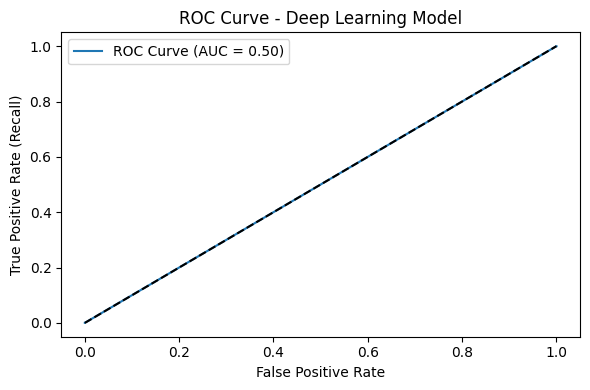

In [24]:
#Step 8: Deep Learning Model with ROC_AUC Evaluation

model = keras.Sequential([
    layers.Dense(128, activation = 'relu',
                 input_shape = (X_train_resampled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid') #Binary classification output
])

#Compile the model
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = [tf.keras.metrics.AUC(name = 'auc')]
            )

#Train the model
history = model.fit(X_train_resampled, y_train_resampled, validation_data=(X_test, y_test), epochs = 10, batch_size = 256, verbose = 1)

#predict probabilities for positive class (default = 1)
y_pred_prob = model.predict(X_test).ravel()

#compute ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nROC-AUC Score (Deep Learning Model): {roc_auc:.2f}")

#plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, label = f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1],[0, 1], 'k--')
plt.title('ROC Curve - Deep Learning Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.tight_layout()
plt.show()


    